In [1]:
# Uma empresa de varejo “ABC Private Limited” deseja entender o comportamento de compra do cliente 
# (especificamente, o valor da compra) em relação a vários produtos de diferentes categorias. 
# Eles compartilharam resumos de compras de vários clientes 
# para produtos selecionados de alto volume no mês passado.
# O conjunto de dados também contém informações demográficas do cliente 
# (idade, sexo, estado civil, tipo de cidade, ficar na cidade atual), detalhes do produto 
# (ID do produto e categoria do produto) e valor total da compra do último mês.

# Agora, eles querem construir um modelo para PREVER o valor da compra dos clientes 
# em relação a vários produtos, o que os ajudará a criar uma oferta personalizada 
# para os clientes em relação a diferentes produtos.


# --- Tarefas a executar:

# A coluna da compra é a variável de destino, execute a análise univariada e a análise bivariada da compra. OK

# Mascarado na descrição da coluna significa já convertido de valor categórico para coluna numérica.

# Os pontos abaixo mencionados são fornecidos apenas para você começar com o conjunto de dados, 
# não sendo obrigatório seguir a mesma sequência.


# --- PRÉ-PROCESSAMENTO DE DADOS

# > Verifique as estatísticas básicas do conjunto de dados OK

# > Verifique se há valores ausentes nos dados OK

# > Verifique se há valores exclusivos nos dados OK


# --- Executar EDA (Exploratory Data Analysis - EDA)

# > Distribuição de compra OK

# > Verifique se há valores discrepantes OK

# > Análise por sexo, estado civil, ocupação, ocupação vs compra, compra por cidade, compra por faixa etária, etc. OK

# > Elimine campos desnecessários OK

# > Converter dados categóricos em número inteiro usando a função de mapa (por exemplo, coluna 'Sexo') OK

# > Tratamento de valor ausente OK 

# > Renomear colunas OK

# > Preencha os valores nan OK

# > Mapear variáveis de intervalo em números inteiros (por exemplo, coluna 'Idade') OK


# --- Visualização de dados

# > Visualizar uma coluna individual OK
# > Idade vs Comprado OK
# > Ocupação vs Comprado OK
# > Productcategory1 vs Comprado OK
# > Productcategory2 vs Comprado OK
# > Productcategory3 vs Comprado OK
# > Gráfico de pizza de categoria de cidade OK
# > Verifique se há mais parcelas possíveis OK

In [2]:
# Análise Univariada:

# Estatísticas descritivas: Calcule medidas como média, mediana, desvio padrão, mínimo e máximo 
# para obter uma visão geral do valor de compra.
# Histograma: Crie um histograma para visualizar a distribuição dos valores de compra e identificar padrões, 
# como se há uma concentração em determinados intervalos.
# Box plot: Construa um box plot para identificar a presença de outliers 
# e entender a dispersão dos valores de compra.
# Gráfico de densidade: Plote um gráfico de densidade para visualizar a forma da distribuição dos valores de compra.
    
# Análise Bivariada:

# Gráfico de dispersão: Faça um gráfico de dispersão 
# para investigar a relação entre o valor de compra e outra variável específica, 
# como a categoria do produto. Isso pode ajudar a identificar tendências ou padrões.
# Matriz de correlação: Calcule a matriz de correlação para medir a força 
# e a direção da relação linear entre o valor de compra e outras variáveis numéricas. 
# Isso pode ajudar a identificar quais variáveis estão mais correlacionadas com o valor de compra.
# Gráfico de barras: Crie um gráfico de barras para visualizar a média 
# ou a soma dos valores de compra agrupados por uma variável categórica, como o gênero ou a faixa etária dos usuários.

In [3]:
# Marital_Status: estado civil

In [4]:
# Preencher com a MODA quando tem poucos valores ausentes
# Para valores assimétricos no boxplot aplicar a MEDIANA

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import plotly.graph_objects as go

%matplotlib inline

import nltk # pip install nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

import requests
from io import BytesIO
from zipfile import ZipFile

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
# from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import RANSACRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

In [6]:
df = pd.read_csv(r"C:\Users\Thalles Rodrigues\Documents\CSVs/black_friday_train.csv")

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [8]:
df.Purchase.describe().round(2)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [12]:
df.groupby('Age')['Purchase'].mean().round(2)

Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64

In [13]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

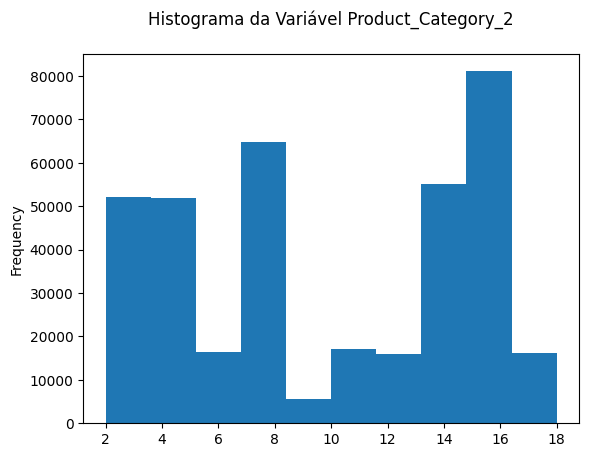

In [14]:
# Histograma
df.Product_Category_2.plot(kind = "hist")
plt.title("Histograma da Variável Product_Category_2\n")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


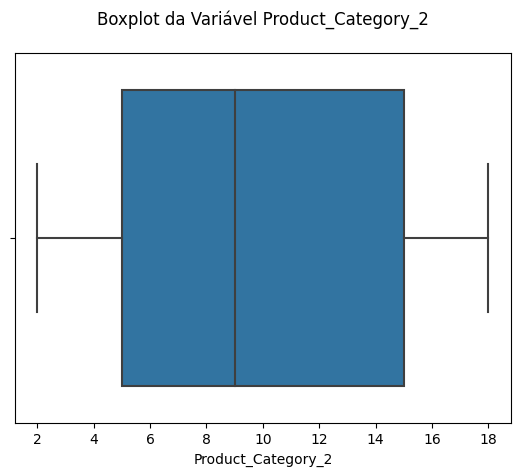

In [15]:
# Boxplot
sns.boxplot(df.Product_Category_2)
plt.title("Boxplot da Variável Product_Category_2\n")
plt.show()

In [16]:
df.Product_Category_2.mean()

9.842329251122386

In [17]:
df.Product_Category_2.median()

9.0

In [18]:
df.Product_Category_2.mode()

0    8.0
Name: Product_Category_2, dtype: float64

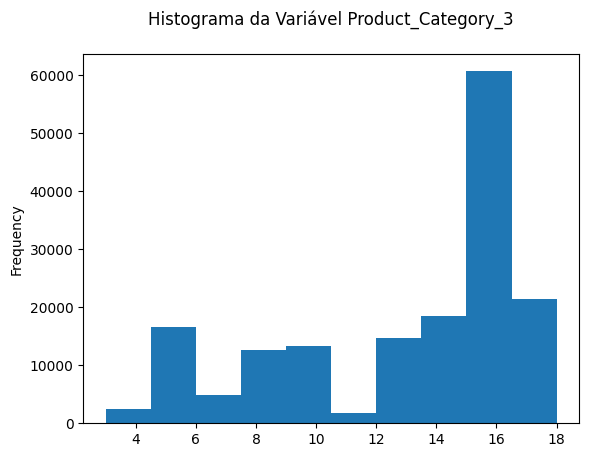

In [19]:
# Histograma
df.Product_Category_3.plot(kind = "hist")
plt.title("Histograma da Variável Product_Category_3\n")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


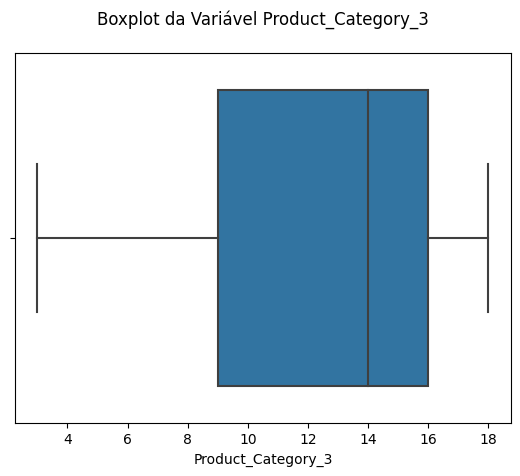

In [20]:
# Boxplot
sns.boxplot(df.Product_Category_3)
plt.title("Boxplot da Variável Product_Category_3\n")
plt.show()

In [21]:
df.Product_Category_3.mean()

12.668243206790512

In [22]:
df.Product_Category_3.median()

14.0

In [23]:
df.Product_Category_3.mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [24]:
# Percentual de valores ausentes na variável Product_Category_2
df.Product_Category_2.isnull().mean()*100

31.56664266963357

In [25]:
# Percentual de valores ausentes na variável Product_Category_3
df.Product_Category_3.isnull().mean()*100

69.67265865311198

In [26]:
# dropar coluna Product_Category_2 e Product_Category_3
# valores ausentes acima 30%: DROP na coluna!

In [27]:
# Drop das colunas
df.drop(["Product_Category_2", "Product_Category_3"], axis = 1, inplace = True)

In [28]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [29]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [30]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

<Axes: title={'center': 'Distribuição de Compras'}, ylabel='Frequency'>

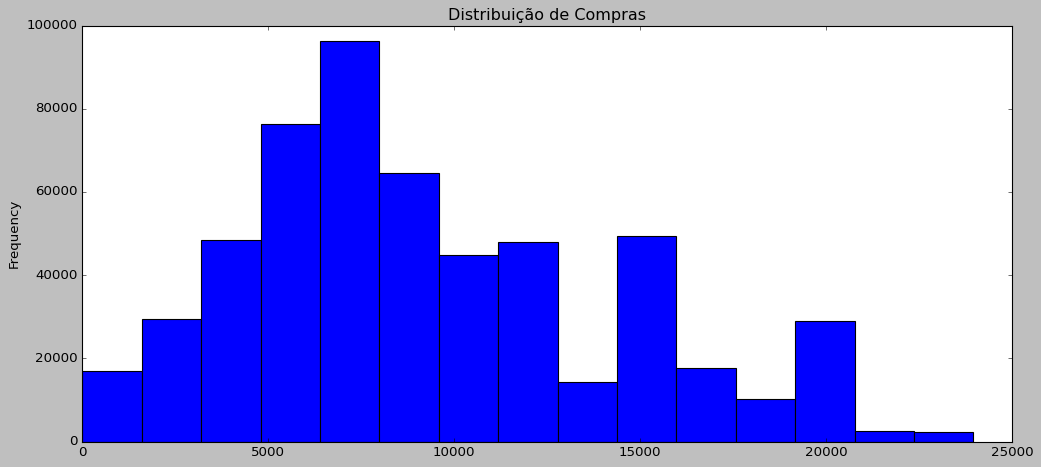

In [31]:
plt.style.use('classic')
df['Purchase'].plot(kind='hist',
                bins=15, 
                edgecolor = 'black',
                figsize=(15,6.5),
                title='Distribuição de Compras')

In [32]:
gender=df[['Gender','User_ID']].groupby('Gender').count()

In [33]:
gender

,User_ID
Gender,
F,135809
M,414259


array([<Axes: ylabel='User_ID'>], dtype=object)

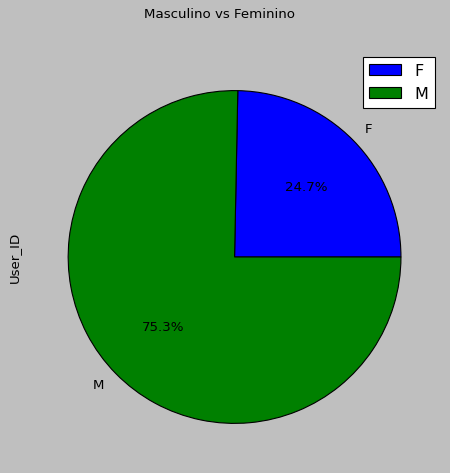

In [34]:
# plt.style.use('Solarize_Light2')
gender.plot(kind='pie',
                  autopct='%1.1f%%',
                  subplots=True,
                  title='Masculino vs Feminino',
                  figsize=(15,6.5))

In [35]:
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()

In [36]:
gender_pu

,Purchase
Gender,
F,1186232642
M,3909580100


array([<Axes: ylabel='Purchase'>], dtype=object)

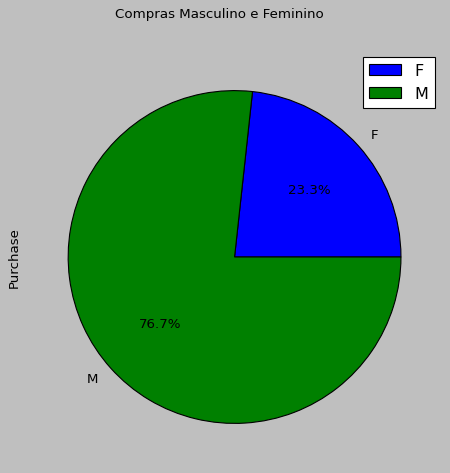

In [37]:
gender_pu.plot(kind='pie',
               autopct='%1.1f%%',
               subplots=True,
               figsize=(15,6.5),
               title='Compras Masculino e Feminino')

In [38]:
contagem=df.Age.value_counts()

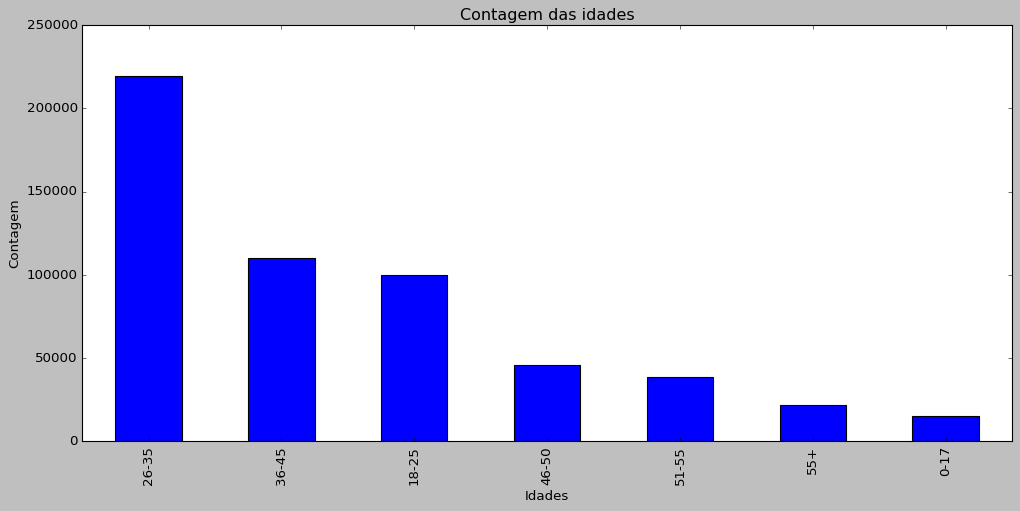

In [39]:
contagem.plot.bar(figsize=(15, 6.5))

plt.title('Contagem das idades')
plt.xlabel('Idades')
plt.ylabel('Contagem')

plt.show()

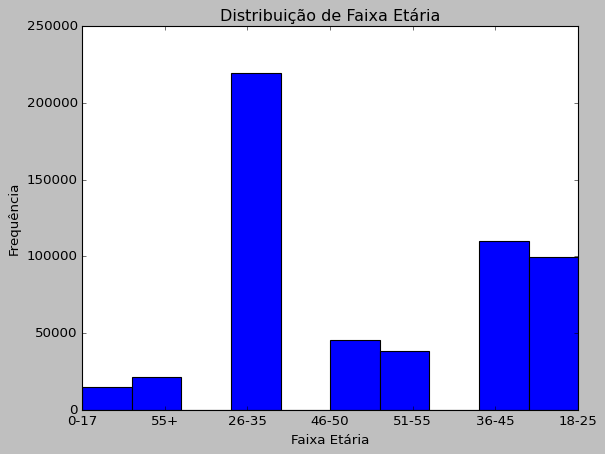

In [40]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Distribuição de Faixa Etária')
plt.show()

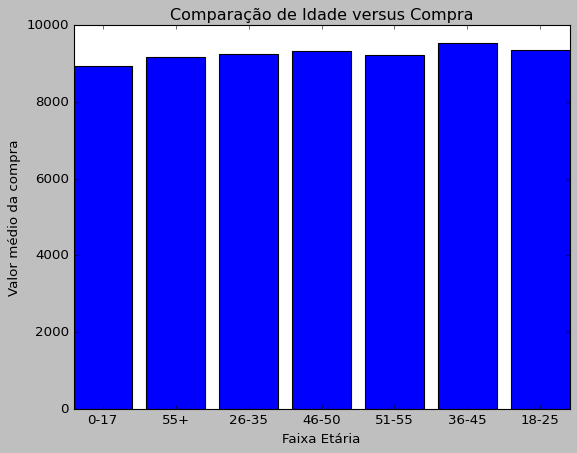

In [41]:
# Exemplo: Comparação de idade versus compra
plt.bar(df['Age'].unique(), df.groupby('Age')['Purchase'].mean())
plt.xlabel('Faixa Etária')
plt.ylabel('Valor médio da compra')
plt.title('Comparação de Idade versus Compra')
plt.show()

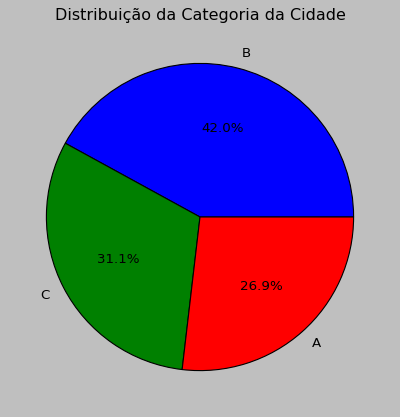

In [42]:
city_category_counts = df['City_Category'].value_counts()
city_category_counts.plot.pie(autopct='%1.1f%%')
plt.title('Distribuição da Categoria da Cidade')
plt.ylabel('')
plt.show()

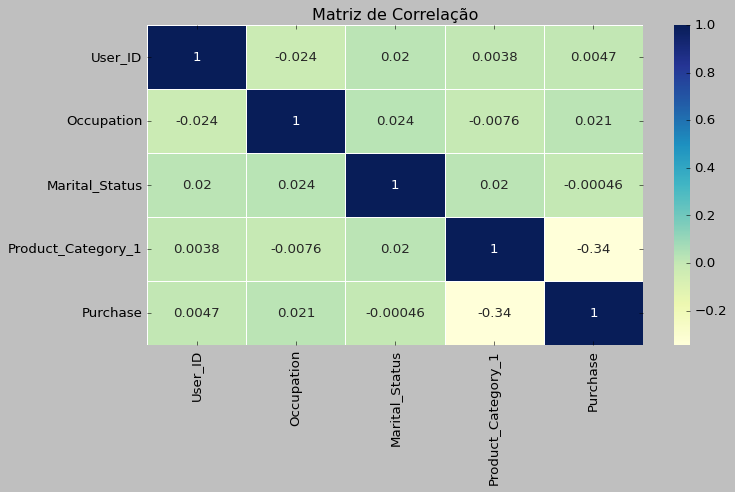

In [43]:
f, ax = plt.subplots(figsize=(10, 5))
corr = df.corr()

# Desenhe o mapa de calor com as anotações e a proporção correta
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

plt.title('Matriz de Correlação')
plt.show()


<Axes: xlabel='Age', ylabel='Purchase'>

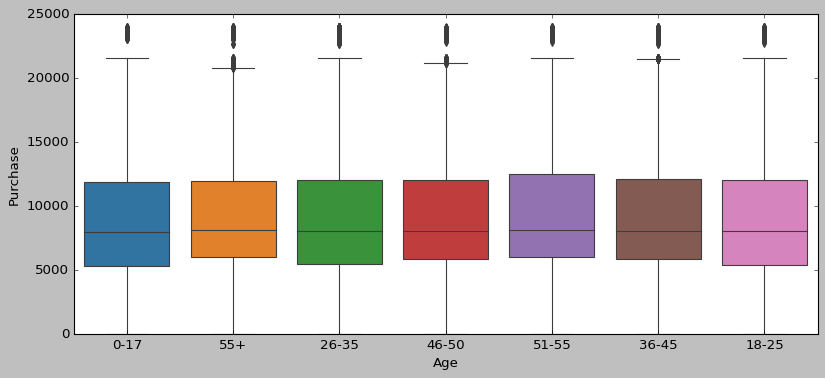

In [44]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Age', y="Purchase", data=df, palette="tab10")

<Axes: xlabel='City_Category', ylabel='Purchase'>

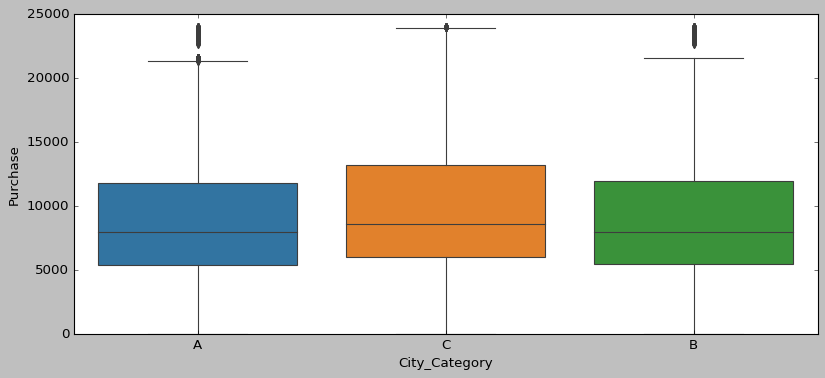

In [45]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x="City_Category", y="Purchase", data=df, palette="tab10")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

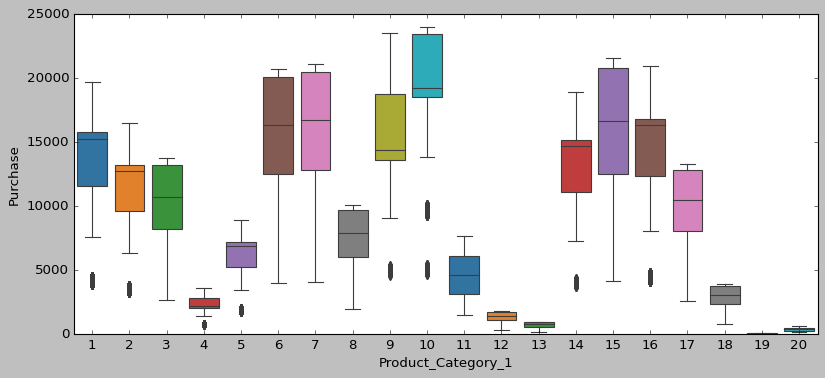

In [46]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x="Product_Category_1", y="Purchase", data=df, palette="tab10")

<Axes: xlabel='Occupation', ylabel='Purchase'>

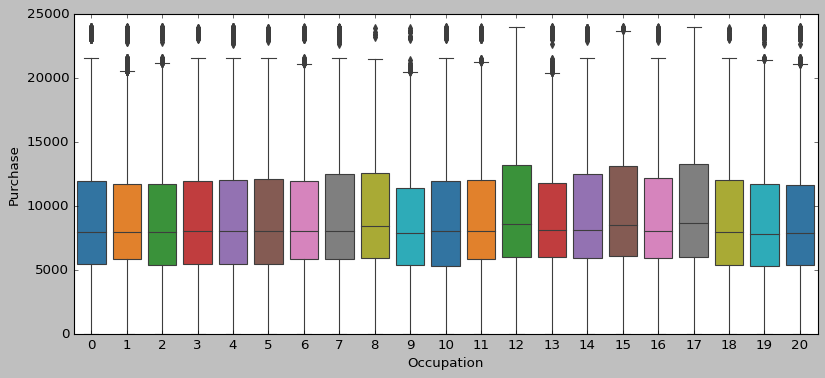

In [47]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x="Occupation", y="Purchase", data=df, palette="tab10")

In [48]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [49]:
age_mapping = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

df['Age'] = df['Age'].map(age_mapping)

In [50]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,8370
1,1000001,P00248942,F,0,10,A,2,0,1,15200
2,1000001,P00087842,F,0,10,A,2,0,12,1422
3,1000001,P00085442,F,0,10,A,2,0,12,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,5,13,B,1,1,20,368
550064,1006035,P00375436,F,2,1,C,3,0,20,371
550065,1006036,P00375436,F,2,15,B,4+,1,20,137
550066,1006038,P00375436,F,6,1,C,2,0,20,365


In [51]:
new_column_names = {
    'User_ID': 'ID_Usuário',
    'Product_ID': 'ID_Produto',
    'Gender': 'Gênero',
    'Age': 'Faixa_Etária',
    'Occupation': 'Ocupação',
    'City_Category': 'Categoria_Cidade',
    'Stay_In_Current_City_Years': 'Tempo_Permanência',
    'Marital_Status': 'Estado_Civil',
    'Product_Category_1': 'Categoria_Produto1',
    'Purchase': 'Valor_Compra'
}

df = df.rename(columns=new_column_names)

In [52]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra
0,1000001,P00069042,F,0,10,A,2,0,3,8370
1,1000001,P00248942,F,0,10,A,2,0,1,15200
2,1000001,P00087842,F,0,10,A,2,0,12,1422
3,1000001,P00085442,F,0,10,A,2,0,12,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,5,13,B,1,1,20,368
550064,1006035,P00375436,F,2,1,C,3,0,20,371
550065,1006036,P00375436,F,2,15,B,4+,1,20,137
550066,1006038,P00375436,F,6,1,C,2,0,20,365


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID_Usuário          550068 non-null  int64 
 1   ID_Produto          550068 non-null  object
 2   Gênero              550068 non-null  object
 3   Faixa_Etária        550068 non-null  int64 
 4   Ocupação            550068 non-null  int64 
 5   Categoria_Cidade    550068 non-null  object
 6   Tempo_Permanência   550068 non-null  object
 7   Estado_Civil        550068 non-null  int64 
 8   Categoria_Produto1  550068 non-null  int64 
 9   Valor_Compra        550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [54]:
df.describe()

,ID_Usuário,Faixa_Etária,Ocupação,Estado_Civil,Categoria_Produto1,Valor_Compra
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,2.496430,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,1.353632,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,2.000000,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,3.000000,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,6.000000,20.000000,1.000000,20.000000,23961.000000


In [55]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra
0,1000001,P00069042,F,0,10,A,2,0,3,8370
1,1000001,P00248942,F,0,10,A,2,0,1,15200
2,1000001,P00087842,F,0,10,A,2,0,12,1422
3,1000001,P00085442,F,0,10,A,2,0,12,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,5,13,B,1,1,20,368
550064,1006035,P00375436,F,2,1,C,3,0,20,371
550065,1006036,P00375436,F,2,15,B,4+,1,20,137
550066,1006038,P00375436,F,6,1,C,2,0,20,365


In [56]:
# medidas
media = df['Valor_Compra'].mean()
mediana = df['Valor_Compra'].median()
desvio_padrao = df['Valor_Compra'].std()
minimo = df['Valor_Compra'].min()
maximo = df['Valor_Compra'].max()

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)

Média: 9263.968712959126
Mediana: 8047.0
Desvio Padrão: 5023.065393820627
Mínimo: 12
Máximo: 23961


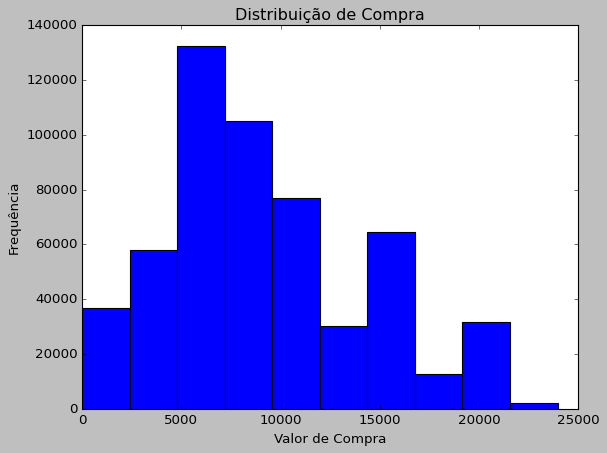

In [57]:
valores_compra = df['Valor_Compra']

plt.hist(valores_compra, bins=10)
plt.xlabel('Valor de Compra')
plt.ylabel('Frequência')
plt.title('Distribuição de Compra')
plt.show()

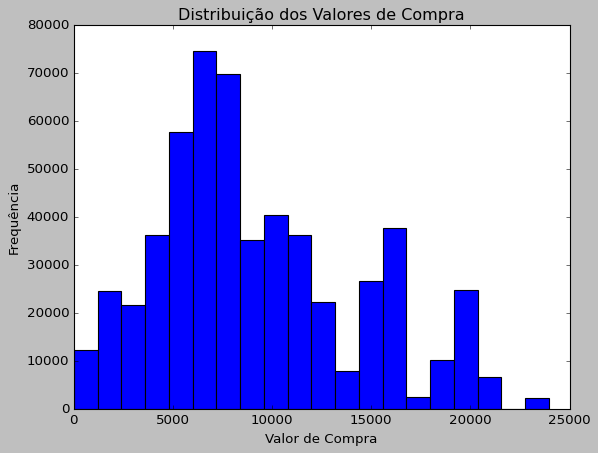

In [58]:
# histograma
plt.hist(df['Valor_Compra'], bins=20)  
plt.xlabel('Valor de Compra')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores de Compra')
plt.show()

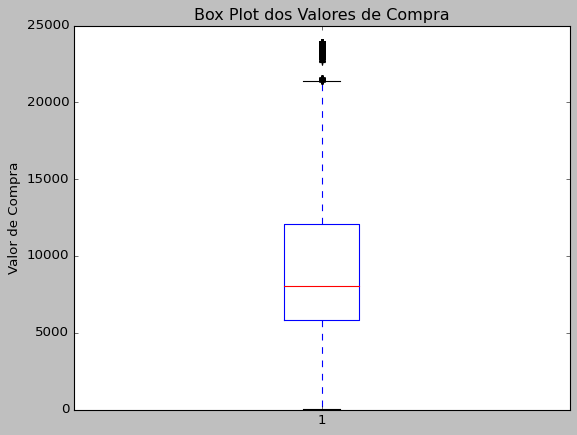

In [59]:
# box plot
plt.boxplot(df['Valor_Compra'])
plt.ylabel('Valor de Compra')
plt.title('Box Plot dos Valores de Compra')
plt.show()

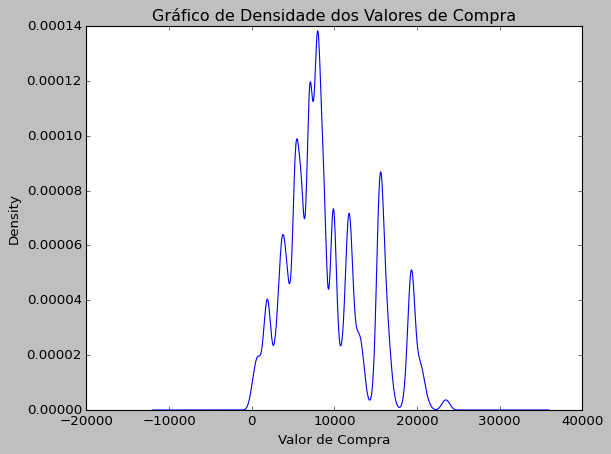

In [60]:
# gráfico de densidade
df['Valor_Compra'].plot(kind='density')
plt.xlabel('Valor de Compra')
plt.title('Gráfico de Densidade dos Valores de Compra')
plt.show()

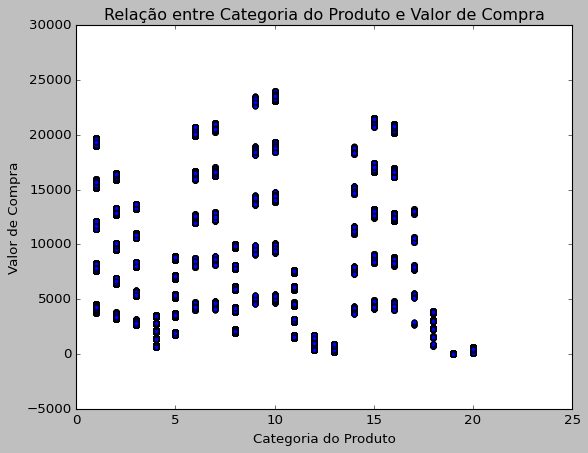

In [61]:
# gráfico de dispersão
plt.scatter(df['Categoria_Produto1'], df['Valor_Compra'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Valor de Compra')
plt.title('Relação entre Categoria do Produto e Valor de Compra')
plt.show()

In [62]:
df.corr()*100

,ID_Usuário,Faixa_Etária,Ocupação,Estado_Civil,Categoria_Produto1,Valor_Compra
ID_Usuário,100.000000,3.269840,-2.397072,2.044264,0.382461,0.471566
Faixa_Etária,3.269840,100.000000,9.146315,31.173840,6.119713,1.583859
Ocupação,-2.397072,9.146315,100.000000,2.427996,-0.761756,2.083262
Estado_Civil,2.044264,31.173840,2.427996,100.000000,1.988785,-0.046338
Categoria_Produto1,0.382461,6.119713,-0.761756,1.988785,100.000000,-34.370335
Valor_Compra,0.471566,1.583859,2.083262,-0.046338,-34.370335,100.000000


In [63]:
# matriz de correlação
correlation_matrix = df[['Valor_Compra', 'Categoria_Produto1']].corr()*100

print(correlation_matrix)

                    Valor_Compra  Categoria_Produto1
Valor_Compra          100.000000          -34.370335
Categoria_Produto1    -34.370335          100.000000


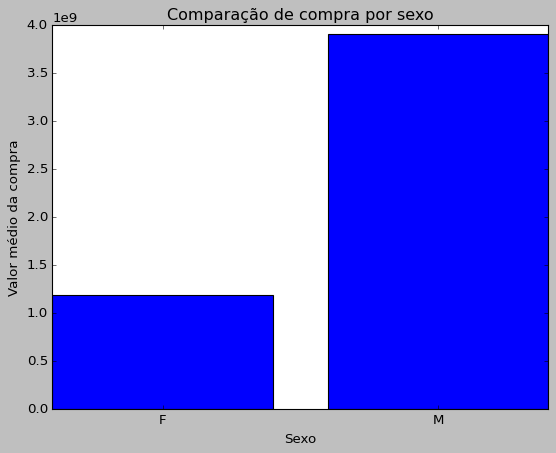

In [64]:
# Exemplo: Comparação de compra por sexo
plt.bar(df['Gênero'].unique(), df.groupby('Gênero')['Valor_Compra'].sum())
plt.xlabel('Sexo')
plt.ylabel('Valor médio da compra')
plt.title('Comparação de compra por sexo')
plt.show()

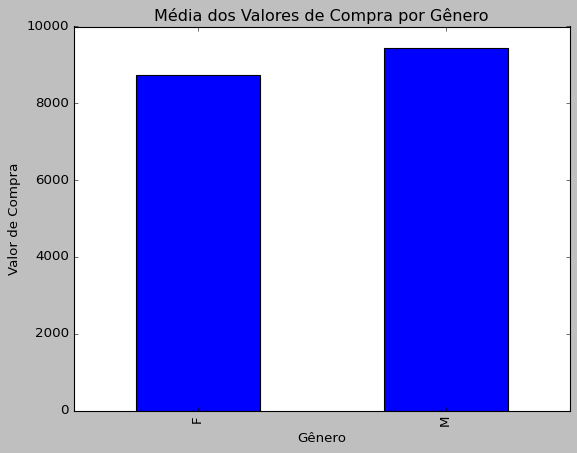

In [65]:
# média dos valores de compra por categoria
data_grouped = df.groupby('Gênero')['Valor_Compra'].mean() 

# Plotar o gráfico de barras
data_grouped.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Valor de Compra')
plt.title('Média dos Valores de Compra por Gênero')
plt.show()

In [66]:
df.nunique()

ID_Usuário             5891
ID_Produto             3631
Gênero                    2
Faixa_Etária              7
Ocupação                 21
Categoria_Cidade          3
Tempo_Permanência         5
Estado_Civil              2
Categoria_Produto1       20
Valor_Compra          18105
dtype: int64

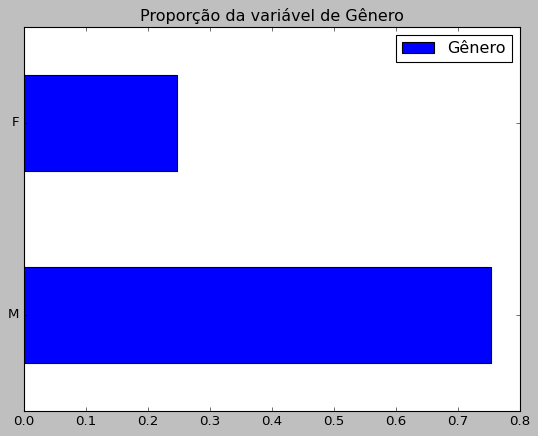

In [67]:
df.Gênero.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de Gênero")
plt.legend()
plt.show()

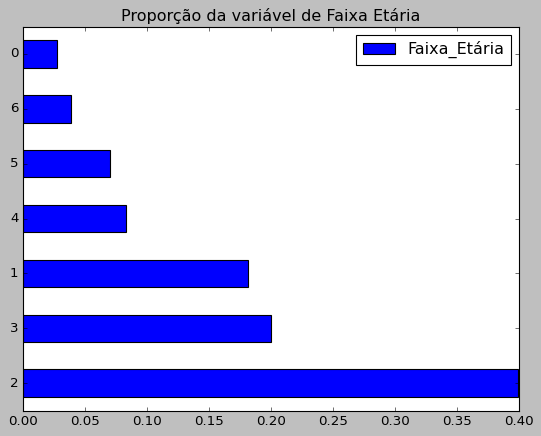

In [68]:
df.Faixa_Etária.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de Faixa Etária")
plt.legend()
plt.show()

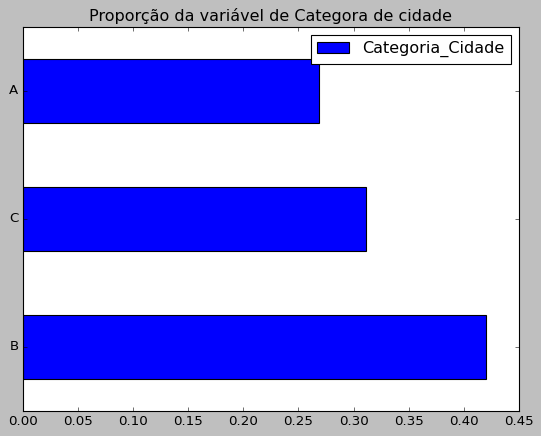

In [69]:
df.Categoria_Cidade.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de Categora de cidade")
plt.legend()
plt.show()

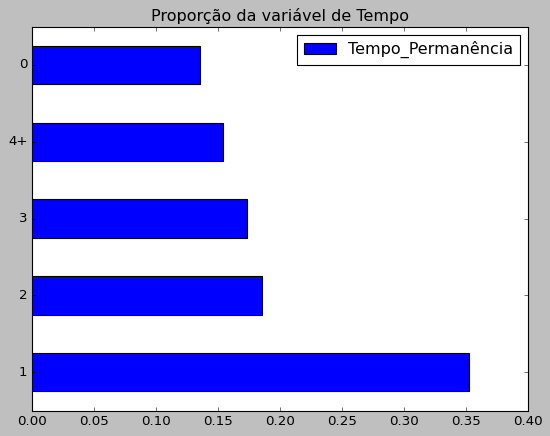

In [70]:
df.Tempo_Permanência.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de Tempo")
plt.legend()
plt.show()

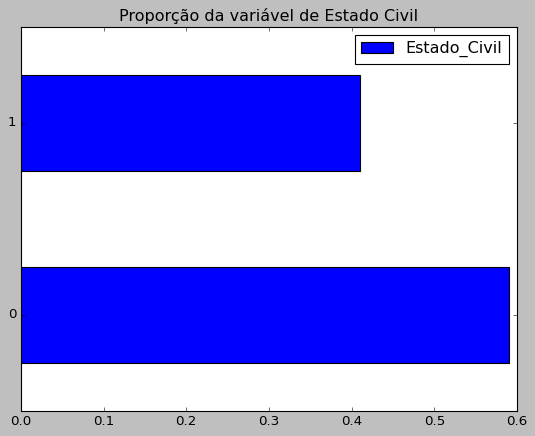

In [71]:
df.Estado_Civil.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de Estado Civil")
plt.legend()
plt.show()

In [72]:
df.groupby(by = ["Gênero"])["Valor_Compra"].mean().round(2)

Gênero
F    8734.57
M    9437.53
Name: Valor_Compra, dtype: float64

In [73]:
df.groupby(by = ["Faixa_Etária"])["Valor_Compra"].mean().round(2)

Faixa_Etária
0    8933.46
1    9169.66
2    9252.69
3    9331.35
4    9208.63
5    9534.81
6    9336.28
Name: Valor_Compra, dtype: float64

In [74]:
df.groupby(by = ["Categoria_Cidade"])["Valor_Compra"].mean().round(2)

Categoria_Cidade
A    8911.94
B    9151.30
C    9719.92
Name: Valor_Compra, dtype: float64

In [75]:
df.groupby(by = ["Tempo_Permanência"])["Valor_Compra"].mean().round(2)

Tempo_Permanência
0     9180.08
1     9250.15
2     9320.43
3     9286.90
4+    9275.60
Name: Valor_Compra, dtype: float64

In [76]:
df.groupby(by = ["Estado_Civil"])["Valor_Compra"].mean().round(2)

Estado_Civil
0    9265.91
1    9261.17
Name: Valor_Compra, dtype: float64

In [77]:
# count frequency encoding: alta
# one hot encoding: médio (get dummies)
# label encoding: baixo

In [78]:
df.corr()*100

,ID_Usuário,Faixa_Etária,Ocupação,Estado_Civil,Categoria_Produto1,Valor_Compra
ID_Usuário,100.000000,3.269840,-2.397072,2.044264,0.382461,0.471566
Faixa_Etária,3.269840,100.000000,9.146315,31.173840,6.119713,1.583859
Ocupação,-2.397072,9.146315,100.000000,2.427996,-0.761756,2.083262
Estado_Civil,2.044264,31.173840,2.427996,100.000000,1.988785,-0.046338
Categoria_Produto1,0.382461,6.119713,-0.761756,1.988785,100.000000,-34.370335
Valor_Compra,0.471566,1.583859,2.083262,-0.046338,-34.370335,100.000000


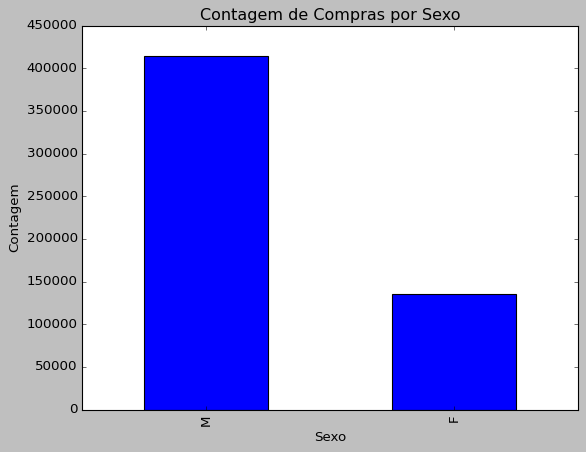

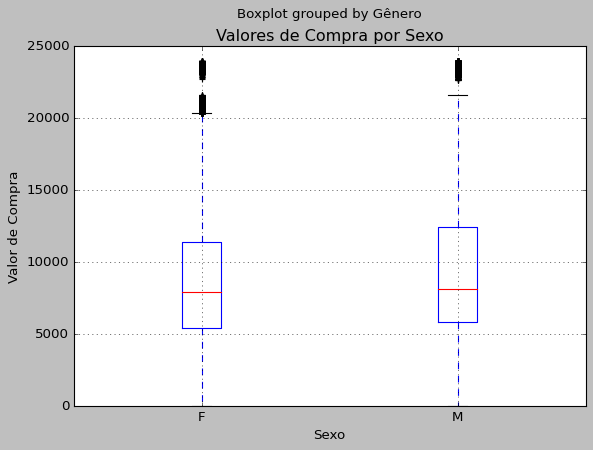

In [79]:
# Contagem de compras por sexo
contagem_sexo = df['Gênero'].value_counts()

# Média de valor de compra por sexo
media_valor_sexo = df.groupby('Gênero')['Valor_Compra'].mean()

# Gráfico de barras para contagem de compras por sexo
contagem_sexo.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Contagem de Compras por Sexo')
plt.show()

# Gráfico de boxplot comparando os valores de compra por sexo
df.boxplot(column='Valor_Compra', by='Gênero')
plt.xlabel('Sexo')
plt.ylabel('Valor de Compra')
plt.title('Valores de Compra por Sexo')
plt.show()

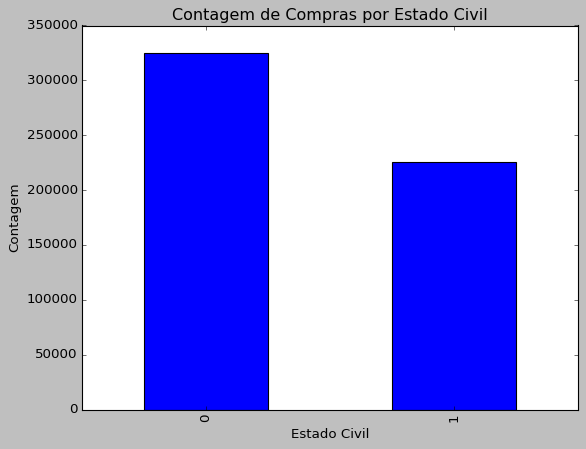

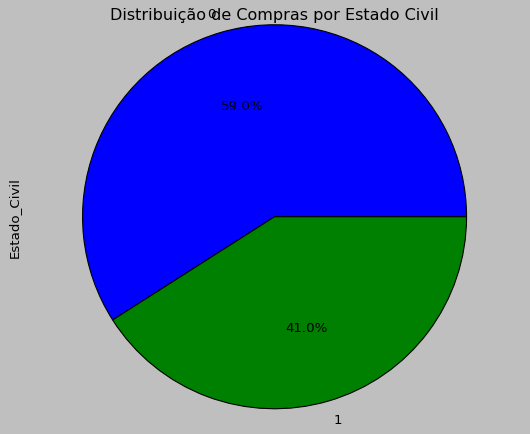

In [80]:
# Contagem de compras por estado civil
contagem_estado_civil = df['Estado_Civil'].value_counts()

# Média de valor de compra por estado civil
media_valor_estado_civil = df.groupby('Estado_Civil')['Valor_Compra'].mean()

# Gráfico de barras para contagem de compras por estado civil
contagem_estado_civil.plot(kind='bar')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.title('Contagem de Compras por Estado Civil')
plt.show()

# Gráfico de pizza mostrando a distribuição de compras por estado civil
contagem_estado_civil.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição de Compras por Estado Civil')
plt.show()

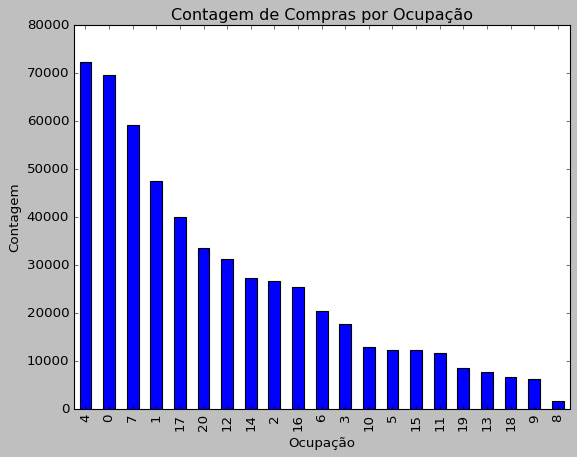

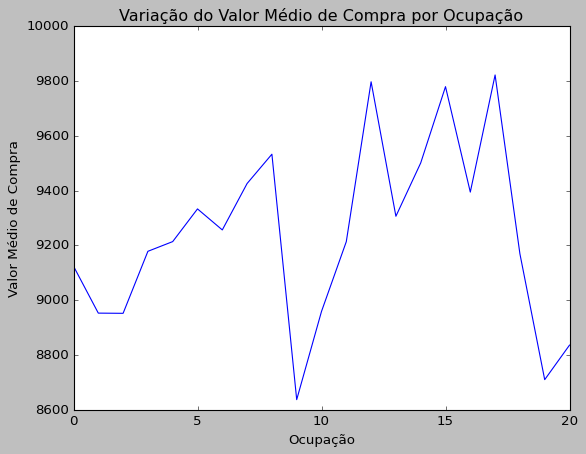

In [81]:
# Contagem de compras por ocupação
contagem_ocupacao = df['Ocupação'].value_counts()

# Média de valor de compra por ocupação
media_valor_ocupacao = df.groupby('Ocupação')['Valor_Compra'].mean()

# Gráfico de barras para contagem de compras por ocupação
contagem_ocupacao.plot(kind='bar')
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.title('Contagem de Compras por Ocupação')
plt.show()

# Gráfico de linha mostrando a variação do valor médio de compra ao longo das ocupações
media_valor_ocupacao.plot(kind='line')
plt.xlabel('Ocupação')
plt.ylabel('Valor Médio de Compra')
plt.title('Variação do Valor Médio de Compra por Ocupação')
plt.show()


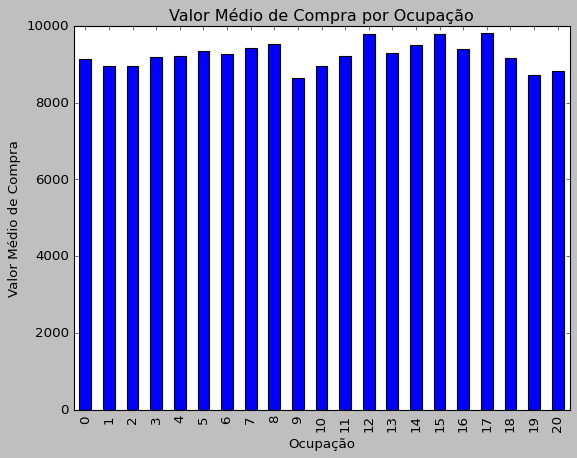

In [82]:
# Média de valor de compra para cada ocupação
media_valor_por_ocupacao = df.groupby('Ocupação')['Valor_Compra'].mean()

# Gráfico de barras comparando a média de valor de compra para diferentes ocupações
media_valor_por_ocupacao.plot(kind='bar')
plt.xlabel('Ocupação')
plt.ylabel('Valor Médio de Compra')
plt.title('Valor Médio de Compra por Ocupação')
plt.show()


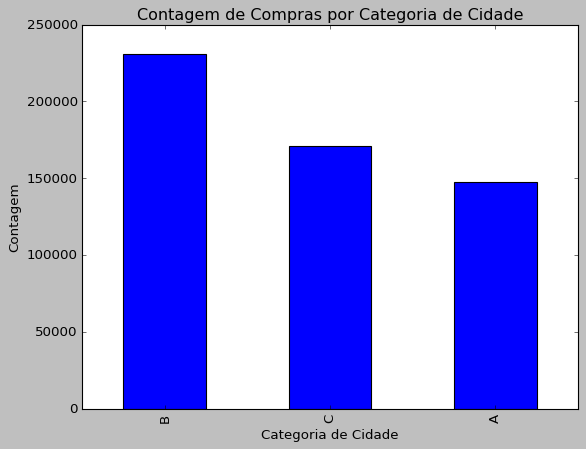

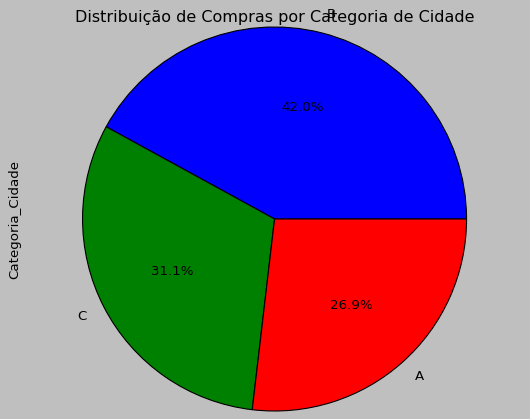

In [83]:
# Contagem de compras por categoria de cidade
contagem_cidade = df['Categoria_Cidade'].value_counts()

# Média de valor de compra por categoria de cidade
media_valor_cidade = df.groupby('Categoria_Cidade')['Valor_Compra'].mean()

# Gráfico de barras para contagem de compras por categoria de cidade
contagem_cidade.plot(kind='bar')
plt.xlabel('Categoria de Cidade')
plt.ylabel('Contagem')
plt.title('Contagem de Compras por Categoria de Cidade')
plt.show()

# Gráfico de pizza mostrando a distribuição de compras por categoria de cidade
contagem_cidade.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição de Compras por Categoria de Cidade')
plt.show()



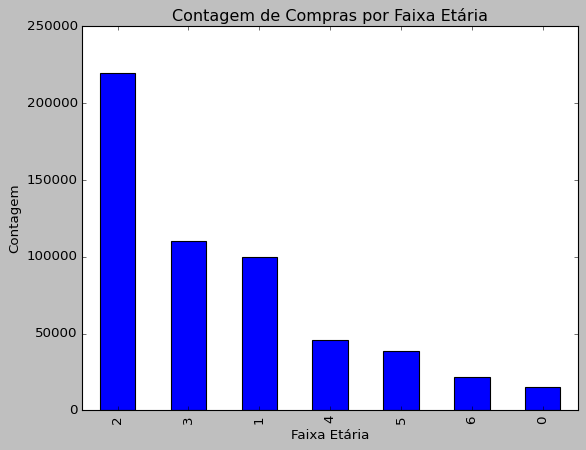

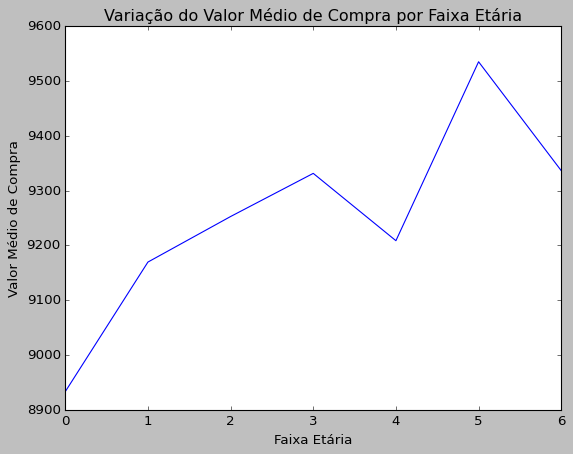

In [84]:
# Contagem de compras por faixa etária
contagem_faixa_etaria = df['Faixa_Etária'].value_counts()

# Média de valor de compra por faixa etária
media_valor_faixa_etaria = df.groupby('Faixa_Etária')['Valor_Compra'].mean()

# Gráfico de barras para contagem de compras por faixa etária
contagem_faixa_etaria.plot(kind='bar')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Compras por Faixa Etária')
plt.show()

# Gráfico de linha mostrando a variação do valor médio de compra ao longo das faixas etárias
media_valor_faixa_etaria.plot(kind='line')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Médio de Compra')
plt.title('Variação do Valor Médio de Compra por Faixa Etária')
plt.show()


In [85]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra
0,1000001,P00069042,F,0,10,A,2,0,3,8370
1,1000001,P00248942,F,0,10,A,2,0,1,15200
2,1000001,P00087842,F,0,10,A,2,0,12,1422
3,1000001,P00085442,F,0,10,A,2,0,12,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,5,13,B,1,1,20,368
550064,1006035,P00375436,F,2,1,C,3,0,20,371
550065,1006036,P00375436,F,2,15,B,4+,1,20,137
550066,1006038,P00375436,F,6,1,C,2,0,20,365


In [86]:
# Criar o dicionário de mapeamento para 'Sexo'
mapeamento_sexo = {'F': 0, 'M': 1}

# Aplicar o mapeamento na coluna 'Sexo'
df['Gênero'] = df['Gênero'].map(mapeamento_sexo)

In [87]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra
0,1000001,P00069042,0,0,10,A,2,0,3,8370
1,1000001,P00248942,0,0,10,A,2,0,1,15200
2,1000001,P00087842,0,0,10,A,2,0,12,1422
3,1000001,P00085442,0,0,10,A,2,0,12,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,B,1,1,20,368
550064,1006035,P00375436,0,2,1,C,3,0,20,371
550065,1006036,P00375436,0,2,15,B,4+,1,20,137
550066,1006038,P00375436,0,6,1,C,2,0,20,365


In [88]:
# valores únicos na coluna "Categoria_Cidade"
cidades_unicas = df['Categoria_Cidade'].unique()

cidades_unicas

array(['A', 'C', 'B'], dtype=object)

In [89]:
# Criar o dicionário de mapeamento para 'Categoria_Cidade'
mapeamento_cidades = {'A': 0, 'B': 1, 'C': 2}

# Aplicar o mapeamento na coluna 'Categoria_Cidade'
df['Categoria_Cidade'] = df['Categoria_Cidade'].map(mapeamento_cidades)

In [90]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra
0,1000001,P00069042,0,0,10,0,2,0,3,8370
1,1000001,P00248942,0,0,10,0,2,0,1,15200
2,1000001,P00087842,0,0,10,0,2,0,12,1422
3,1000001,P00085442,0,0,10,0,2,0,12,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,368
550064,1006035,P00375436,0,2,1,2,3,0,20,371
550065,1006036,P00375436,0,2,15,1,4+,1,20,137
550066,1006038,P00375436,0,6,1,2,2,0,20,365


In [91]:
# valores únicos na coluna "Categoria_Cidade"
tempo_permanencia = df['Tempo_Permanência'].unique()

tempo_permanencia

array(['2', '4+', '3', '1', '0'], dtype=object)

In [92]:
mapeamento_tempo = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

df['Tempo_Permanência'] = df['Tempo_Permanência'].map(mapeamento_tempo)

In [93]:
# valores únicos na coluna "Categoria_Cidade"
id_produto = df['ID_Produto'].unique()

id_produto

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['ID_Produto_Encoded'] = label_encoder.fit_transform(df['ID_Produto'])

In [95]:
df

,ID_Usuário,ID_Produto,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra,ID_Produto_Encoded
0,1000001,P00069042,0,0,10,0,2,0,3,8370,672
1,1000001,P00248942,0,0,10,0,2,0,1,15200,2376
2,1000001,P00087842,0,0,10,0,2,0,12,1422,852
3,1000001,P00085442,0,0,10,0,2,0,12,1057,828
4,1000002,P00285442,1,6,16,2,4,0,8,7969,2734
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,368,3567
550064,1006035,P00375436,0,2,1,2,3,0,20,371,3568
550065,1006036,P00375436,0,2,15,1,4,1,20,137,3568
550066,1006038,P00375436,0,6,1,2,2,0,20,365,3568


In [96]:
df.corr()*100

,ID_Usuário,Gênero,Faixa_Etária,Ocupação,Categoria_Cidade,Tempo_Permanência,Estado_Civil,Categoria_Produto1,Valor_Compra,ID_Produto_Encoded
ID_Usuário,100.000000,-3.347450,3.269840,-2.397072,2.285926,-3.073681,2.044264,0.382461,0.471566,-1.785072
Gênero,-3.347450,100.000000,-0.426200,11.729098,-0.451474,1.466043,-1.160316,-4.559424,6.034568,1.591558
Faixa_Etária,3.269840,-0.426200,100.000000,9.146315,12.307924,-0.471206,31.173840,6.119713,1.583859,2.347594
Ocupação,-2.397072,11.729098,9.146315,100.000000,3.447874,3.000458,2.427996,-0.761756,2.083262,0.742392
Categoria_Cidade,2.285926,-0.451474,12.307924,3.447874,100.000000,1.994580,3.979047,-1.436407,6.191417,0.703187
Tempo_Permanência,-3.073681,1.466043,-0.471206,3.000458,1.994580,100.000000,-1.281878,-0.421310,0.542230,-0.239841
Estado_Civil,2.044264,-1.160316,31.173840,2.427996,3.979047,-1.281878,100.000000,1.988785,-0.046338,1.162129
Categoria_Produto1,0.382461,-4.559424,6.119713,-0.761756,-1.436407,-0.421310,1.988785,100.000000,-34.370335,7.471665
Valor_Compra,0.471566,6.034568,1.583859,2.083262,6.191417,0.542230,-0.046338,-34.370335,100.000000,-10.934487
ID_Produto_Encoded,-1.785072,1.591558,2.347594,0.742392,0.703187,-0.239841,1.162129,7.471665,-10.934487,100.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID_Usuário          550068 non-null  int64 
 1   ID_Produto          550068 non-null  object
 2   Gênero              550068 non-null  int64 
 3   Faixa_Etária        550068 non-null  int64 
 4   Ocupação            550068 non-null  int64 
 5   Categoria_Cidade    550068 non-null  int64 
 6   Tempo_Permanência   550068 non-null  int64 
 7   Estado_Civil        550068 non-null  int64 
 8   Categoria_Produto1  550068 non-null  int64 
 9   Valor_Compra        550068 non-null  int64 
 10  ID_Produto_Encoded  550068 non-null  int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 44.1+ MB


In [98]:
X = df.drop(['Valor_Compra', 'ID_Produto'], axis=1)  # Removendo a coluna 'ID_Produto'
y = df['Valor_Compra']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
models = [
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1),
    Ridge(),
    KNeighborsRegressor(),
    Lasso(),
    BaggingRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(),
    HuberRegressor(),
    LinearRegression(),
    MLPRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    ElasticNet(),
    BayesianRidge()
]

In [101]:
print("-"*80)
for i in models:
    print(i)
    print("-"*80)

--------------------------------------------------------------------------------
DecisionTreeRegressor()
--------------------------------------------------------------------------------
ExtraTreeRegressor()
--------------------------------------------------------------------------------
RandomForestRegressor(n_jobs=-1)
--------------------------------------------------------------------------------
Ridge()
--------------------------------------------------------------------------------
KNeighborsRegressor()
--------------------------------------------------------------------------------
Lasso()
--------------------------------------------------------------------------------
BaggingRegressor()
--------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=F

In [102]:
%%time         
print("-"*70)
for i in models:
    model_name=i.__class__.__name__  
    i.fit(X_train,y_train.values.ravel())
    print(f"Fitting {model_name} done")
    print("-"*80)

----------------------------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------------------------------------
Fitting ExtraTreeRegressor done
--------------------------------------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------------------------------------
Fitting Ridge done
--------------------------------------------------------------------------------
Fitting KNeighborsRegressor done
--------------------------------------------------------------------------------
Fitting Lasso done
--------------------------------------------------------------------------------
Fitting BaggingRegressor done
--------------------------------------------------------------------------------
Fitting XGBRegressor done
--------------------------------------------------------------------------------
Fitting LGBMRegressor done
-------------------------

132:	learn: 2873.1161361	total: 3.88s	remaining: 25.3s
133:	learn: 2872.8763271	total: 3.91s	remaining: 25.3s
134:	learn: 2872.1613980	total: 3.94s	remaining: 25.3s
135:	learn: 2871.5701779	total: 3.97s	remaining: 25.2s
136:	learn: 2871.2043258	total: 4s	remaining: 25.2s
137:	learn: 2870.5379953	total: 4.03s	remaining: 25.2s
138:	learn: 2869.9426993	total: 4.06s	remaining: 25.1s
139:	learn: 2869.4131031	total: 4.08s	remaining: 25.1s
140:	learn: 2868.7269831	total: 4.12s	remaining: 25.1s
141:	learn: 2868.0240584	total: 4.14s	remaining: 25s
142:	learn: 2866.7601911	total: 4.17s	remaining: 25s
143:	learn: 2866.2668233	total: 4.2s	remaining: 25s
144:	learn: 2865.5310447	total: 4.23s	remaining: 24.9s
145:	learn: 2865.2078594	total: 4.26s	remaining: 24.9s
146:	learn: 2864.7396701	total: 4.29s	remaining: 24.9s
147:	learn: 2864.1777898	total: 4.32s	remaining: 24.9s
148:	learn: 2863.6863436	total: 4.35s	remaining: 24.8s
149:	learn: 2863.2436989	total: 4.38s	remaining: 24.8s
150:	learn: 2862.294

286:	learn: 2804.7948829	total: 8.39s	remaining: 20.9s
287:	learn: 2804.5930501	total: 8.42s	remaining: 20.8s
288:	learn: 2804.3578610	total: 8.45s	remaining: 20.8s
289:	learn: 2804.0676622	total: 8.48s	remaining: 20.8s
290:	learn: 2803.8837740	total: 8.51s	remaining: 20.7s
291:	learn: 2803.5539399	total: 8.54s	remaining: 20.7s
292:	learn: 2803.3903960	total: 8.56s	remaining: 20.7s
293:	learn: 2803.0765547	total: 8.59s	remaining: 20.6s
294:	learn: 2802.7992121	total: 8.62s	remaining: 20.6s
295:	learn: 2802.5010786	total: 8.65s	remaining: 20.6s
296:	learn: 2802.1614341	total: 8.68s	remaining: 20.5s
297:	learn: 2801.9273247	total: 8.7s	remaining: 20.5s
298:	learn: 2801.6486208	total: 8.73s	remaining: 20.5s
299:	learn: 2801.4686400	total: 8.75s	remaining: 20.4s
300:	learn: 2801.1343685	total: 8.78s	remaining: 20.4s
301:	learn: 2800.8860905	total: 8.8s	remaining: 20.3s
302:	learn: 2800.5210313	total: 8.84s	remaining: 20.3s
303:	learn: 2800.2988579	total: 8.86s	remaining: 20.3s
304:	learn: 

442:	learn: 2765.8774661	total: 12.8s	remaining: 16.1s
443:	learn: 2765.7588824	total: 12.9s	remaining: 16.1s
444:	learn: 2765.5794248	total: 12.9s	remaining: 16.1s
445:	learn: 2765.3976849	total: 12.9s	remaining: 16s
446:	learn: 2765.3031529	total: 12.9s	remaining: 16s
447:	learn: 2764.9822831	total: 13s	remaining: 16s
448:	learn: 2764.8253029	total: 13s	remaining: 16s
449:	learn: 2764.7011648	total: 13s	remaining: 15.9s
450:	learn: 2764.4212880	total: 13.1s	remaining: 15.9s
451:	learn: 2764.1928525	total: 13.1s	remaining: 15.9s
452:	learn: 2763.9535287	total: 13.1s	remaining: 15.8s
453:	learn: 2763.7356802	total: 13.2s	remaining: 15.8s
454:	learn: 2763.4838681	total: 13.2s	remaining: 15.8s
455:	learn: 2763.2863233	total: 13.2s	remaining: 15.8s
456:	learn: 2763.1909955	total: 13.2s	remaining: 15.7s
457:	learn: 2763.0941830	total: 13.3s	remaining: 15.7s
458:	learn: 2762.9965034	total: 13.3s	remaining: 15.7s
459:	learn: 2762.6760545	total: 13.3s	remaining: 15.6s
460:	learn: 2762.4965590

599:	learn: 2737.3367501	total: 17.3s	remaining: 11.5s
600:	learn: 2737.1345572	total: 17.3s	remaining: 11.5s
601:	learn: 2736.9995397	total: 17.3s	remaining: 11.5s
602:	learn: 2736.9182971	total: 17.4s	remaining: 11.4s
603:	learn: 2736.6907690	total: 17.4s	remaining: 11.4s
604:	learn: 2736.3149946	total: 17.4s	remaining: 11.4s
605:	learn: 2736.1607336	total: 17.4s	remaining: 11.3s
606:	learn: 2736.1036765	total: 17.5s	remaining: 11.3s
607:	learn: 2735.9596818	total: 17.5s	remaining: 11.3s
608:	learn: 2735.8177468	total: 17.5s	remaining: 11.3s
609:	learn: 2735.7351936	total: 17.5s	remaining: 11.2s
610:	learn: 2735.6387707	total: 17.6s	remaining: 11.2s
611:	learn: 2735.3411102	total: 17.6s	remaining: 11.2s
612:	learn: 2735.1686147	total: 17.6s	remaining: 11.1s
613:	learn: 2735.0439889	total: 17.7s	remaining: 11.1s
614:	learn: 2734.8982818	total: 17.7s	remaining: 11.1s
615:	learn: 2734.7520163	total: 17.7s	remaining: 11s
616:	learn: 2734.6204027	total: 17.7s	remaining: 11s
617:	learn: 27

751:	learn: 2715.5557762	total: 21.6s	remaining: 7.13s
752:	learn: 2715.4938280	total: 21.7s	remaining: 7.1s
753:	learn: 2715.3846376	total: 21.7s	remaining: 7.08s
754:	learn: 2715.3199649	total: 21.7s	remaining: 7.05s
755:	learn: 2715.1257589	total: 21.7s	remaining: 7.02s
756:	learn: 2715.0683383	total: 21.8s	remaining: 6.99s
757:	learn: 2714.9728141	total: 21.8s	remaining: 6.96s
758:	learn: 2714.9036280	total: 21.8s	remaining: 6.93s
759:	learn: 2714.8489566	total: 21.9s	remaining: 6.9s
760:	learn: 2714.6989472	total: 21.9s	remaining: 6.87s
761:	learn: 2714.5199996	total: 21.9s	remaining: 6.84s
762:	learn: 2714.4168458	total: 21.9s	remaining: 6.82s
763:	learn: 2714.2321575	total: 22s	remaining: 6.79s
764:	learn: 2713.9948034	total: 22s	remaining: 6.76s
765:	learn: 2713.8829811	total: 22s	remaining: 6.73s
766:	learn: 2713.6784542	total: 22.1s	remaining: 6.71s
767:	learn: 2713.5612106	total: 22.1s	remaining: 6.68s
768:	learn: 2713.3513984	total: 22.1s	remaining: 6.65s
769:	learn: 2713.2

902:	learn: 2697.7301890	total: 26.1s	remaining: 2.8s
903:	learn: 2697.5990247	total: 26.1s	remaining: 2.77s
904:	learn: 2697.5314796	total: 26.1s	remaining: 2.74s
905:	learn: 2697.4832144	total: 26.1s	remaining: 2.71s
906:	learn: 2697.4147874	total: 26.2s	remaining: 2.68s
907:	learn: 2697.3131227	total: 26.2s	remaining: 2.65s
908:	learn: 2697.1992040	total: 26.2s	remaining: 2.63s
909:	learn: 2697.1543532	total: 26.3s	remaining: 2.6s
910:	learn: 2697.0554141	total: 26.3s	remaining: 2.57s
911:	learn: 2696.9472669	total: 26.3s	remaining: 2.54s
912:	learn: 2696.7929378	total: 26.4s	remaining: 2.51s
913:	learn: 2696.7170201	total: 26.4s	remaining: 2.48s
914:	learn: 2696.6173803	total: 26.4s	remaining: 2.45s
915:	learn: 2696.4851327	total: 26.4s	remaining: 2.42s
916:	learn: 2696.4103977	total: 26.5s	remaining: 2.4s
917:	learn: 2696.3208135	total: 26.5s	remaining: 2.37s
918:	learn: 2696.0597907	total: 26.5s	remaining: 2.34s
919:	learn: 2695.9549766	total: 26.6s	remaining: 2.31s
920:	learn: 2

In [103]:
score_dict={}

for i in models:
    
    model_name = i.__class__.__name__
    
    pred=i.predict(X_test)
    
    print("-"*50)
    
    print(model_name)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")

    
    
    score_dict[model_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }
    
print("-"*50)

--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.4331388503784136
Mean Absolute Error Score : 2641.5000727180177
Mean Sqaured Error Score : 14243055.249177378
Root Mean Squared Error: 3773.997250817411
--------------------------------------------------
ExtraTreeRegressor
R2 Score : 0.4201907229154469
Mean Absolute Error Score : 2658.854009489701
Mean Sqaured Error Score : 14568392.229761668
Root Mean Squared Error: 3816.8563281530087
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.695886090987848
Mean Absolute Error Score : 2028.9697673932408
Mean Sqaured Error Score : 7641220.801592991
Root Mean Squared Error: 2764.275818653593
--------------------------------------------------
Ridge
R2 Score : 0.1311318107450561
Mean Absolute Error Score : 3581.5837665717536
Mean Sqaured Error Score : 21831338.471638337
Root Mean Squared Error: 4672.401788335239
--------------------------------------------------
KNeighborsRegr

In [104]:
score_pd=pd.DataFrame(score_dict).transpose()
score_pd*100

,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
DecisionTreeRegressor,43.313885,264150.007272,1.424306e+09,377399.725082
ExtraTreeRegressor,42.019072,265885.400949,1.456839e+09,381685.632815
RandomForestRegressor,69.588609,202896.976739,7.641221e+08,276427.581865
Ridge,13.113181,358158.376657,2.183134e+09,467240.178834
KNeighborsRegressor,14.256887,359614.867926,2.154397e+09,464154.811432
Lasso,13.113148,358155.939037,2.183135e+09,467240.267170
BaggingRegressor,67.179223,210400.612286,8.246607e+08,287169.068637
XGBRegressor,71.862198,198303.333185,7.069955e+08,265893.866356
LGBMRegressor,68.623902,210740.146980,7.883615e+08,280777.754940
CatBoostRegressor,70.375821,203630.707300,7.443424e+08,272826.400424


In [105]:
# XGBRegressor e CatBoostRegressor

In [106]:
%%time 

X = df.drop(['Valor_Compra', 'ID_Produto'], axis=1)  # Removendo a coluna 'ID_Produto'
y = df['Valor_Compra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo XGBRegressor
model = XGBRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R²):', r2)
print("="*80)

# previsões para novos dados
new_data = pd.DataFrame({
    'ID_Usuário': [1000003, 1000004],
    'Gênero': [1, 0],
    'Faixa_Etária': [5, 3],
    'Ocupação': [8, 2],
    'Categoria_Cidade': [2, 1],
    'Tempo_Permanência': [3, 2],
    'Estado_Civil': [1, 0],
    'Categoria_Produto1': [7, 20],
    'ID_Produto_Encoded': [2734, 3567]
})

new_predictions = model.predict(new_data)
print('Previsões para novos dados:')
print(new_predictions.round(2))
print("="*80)

Mean Absolute Error (MAE): 1983.033331845211
Mean Squared Error (MSE): 7069954.816568106
R-squared (R²): 0.7186219778706583
Previsões para novos dados:
[14342.8   1515.96]
Wall time: 5.23 s


In [107]:
%%time 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 7, 10],
    'n_estimators': [200, 300, 400]
}

# modelo escolhido
base_model = XGBRegressor()

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

# Calcular as métricas de avaliação
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R²):', r2)
print("="*80)

# Previsões para novos dados
new_predictions = best_model.predict(new_data)
print('Previsões para novos dados:')
print(new_predictions.round(2))
print("="*80)

# Melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Mean Absolute Error (MAE): 1941.605497685055
Mean Squared Error (MSE): 6792057.3832775
R-squared (R²): 0.7296820528163832
Previsões para novos dados:
[14301.16   325.78]
Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Wall time: 7min 56s
